In [1]:
#a ideia é tentar implementar o yule walker
#source: http://www-stat.wharton.upenn.edu/~steele/Courses/956/Resource/YWSourceFiles/YW-Eshel.pdf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import pacf
from statsmodels.regression.linear_model import yule_walker
from statsmodels.tsa.stattools import adfuller, acovf
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as la

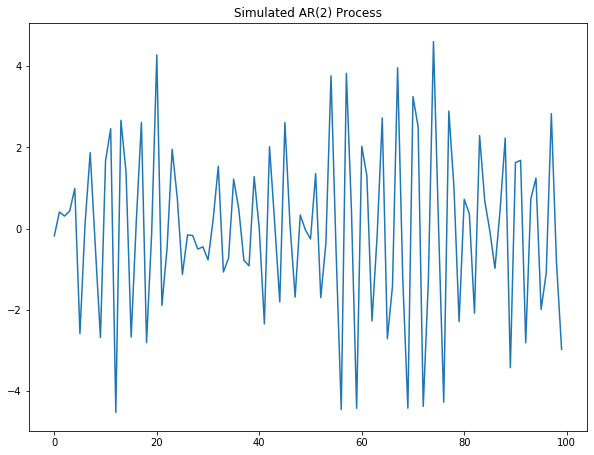

In [14]:
#simulando o AR(2)
ar2 = np.array([1, 0.7, 0.9]) #yt = 1  + 0.33yt-1 + 0.5t-2
ma = np.array([1])
simulated_AR2_data = ArmaProcess(ar2, ma).generate_sample(nsample=100)
plt.figure(figsize=[10, 7.5]); # Set dimensions for figure
plt.plot(simulated_AR2_data)
plt.title("Simulated AR(2) Process")
plt.show()

In [4]:
def move(x, p):

    return(np.append(x[len(x) - p:len(x)], x[0: len(x) - p]))

def move_s(x, p):
    
    a = x[1:p+1] 
    a = a[::-1]
    return np.append(a, x[0: len(x) - p])

In [23]:
#testando no dataset: 

rs_2 = []
for p in range(0,3):
    
    #r = np.cov(simulated_AR2_data, move(simulated_AR2_data, p))[0][1]/np.cov(simulated_AR2_data, move(simulated_AR2_data, p))[0][0]
    r = np.cov(simulated_AR2_data, move(simulated_AR2_data, p))[0][1]
    print(r)
    rs_2.append(r)
    

4.415708773233217
-1.442715878800678
-2.8659838755820672


In [25]:
rs = [x/rs_2[0] for x in rs_2]
rs

[1.0, -0.32672351209980494, -0.6490427749571833]

In [26]:
s = []
for p in range(0,3): #leva 4 períodos
    s.append(move_s(rs,p))
s

[array([ 1.        , -0.32672351, -0.64904277]),
 array([-0.32672351,  1.        , -0.32672351]),
 array([-0.64904277, -0.32672351,  1.        ])]

In [27]:
rs_array = np.array(rs).T

In [28]:
k = la.inv(np.array(s))
k.dot(rs_array) #correto: [1, 0.33, 0.5]

array([1.00000000e+00, 2.22044605e-16, 0.00000000e+00])

In [29]:
k

array([[3.94060899, 2.37685003, 3.33419658],
       [2.37685003, 2.55314558, 2.37685003],
       [3.33419658, 2.37685003, 3.94060899]])